<a href="https://colab.research.google.com/github/yoonji0116/IT-class/blob/main/%EC%8B%9C%EA%B0%81%ED%99%94%EA%B3%BC%EC%A0%9C_2013408_%EA%B0%95%EC%9C%A4%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **- 과제**

다음 **2020년도 건강검진정보 샘플(1만건)** 데이터를 이용하여 시각화 과정, 즉 탐색적 데이터 분석(Exploratory Data Analysis)을 수행하고 검진결과의 특징을 보여주시오. 

 health_data.csv  (31개 항목, 1만건 데이터) 
 
 health_data_description.xlsx  (데이터 설명) 

- matplotlib/seaborn/pandas 패키지를 이용하고, 필요하다면 엑셀 또는 파이썬 코드로 데이터 전처리 수행 
- 이용한 차트의 종류가 3가지 이상이어야 함 (산점도, 막대 그래프, 라인 그래프 등)
- 시각화 결과를 해석하고  3가지의 인사이트 도출하기 
- 코드는 github에 올리고 주소 제출



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# health 데이터 가져오기
import pandas as pd

health = pd.read_csv("/content/drive/My Drive/3-2/IT class/health_data.csv")
display(health.head()) 
print(health.info())  

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [4]:
health.describe()

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,5000.50000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,2886.89568,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,1.00000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,2500.75000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,5000.50000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,7500.25000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,10000.00000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


### **전처리**
시도코드, 연령대코드 등 숫자로 되어있어 어떤 값을 의미하는지 알기 어렵다. 
데이터를 알아보기 쉽게 숫자로 제공된 것들을 텍스트로 바꾸어주는 작업을 먼저 실행한다.  

In [5]:
health['시도코드']=health['시도코드'].replace([11,26,27,28,29,30,31,36,41,42,43,44,45,46,47,48,49],['서울시특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','세종특별차시','경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주도특별차지도'])

In [6]:
health['시도코드'].value_counts(sort=True)
# 열의 각 값에 대한 모든 발생 횟수 반환

경기도         2495
서울시특별시      1644
부산광역시        681
경상남도         663
인천광역시        561
경상북도         523
대구광역시        495
충청남도         430
전라남도         395
전라북도         392
강원도          343
대전광역시        331
충청북도         323
광주광역시        280
울산광역시        244
제주도특별차지도     123
세종특별차시        77
Name: 시도코드, dtype: int64

In [7]:
health['성별코드'] = health['성별코드'].replace(['M','F'], ['남자', '여자'])

In [8]:
health['성별코드'].value_counts()

남자    5138
여자    4862
Name: 성별코드, dtype: int64

In [13]:
health['연령대코드(5세단위)']=health['연령대코드(5세단위)'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],['0~4세','5~9세','10~14세','15~19세','20~24세','25~29세','30~34세','35~39세','40~44세','45~49세','50~54세','55~59세','60~64세','65~69세','70~74세','75~79세','80~84세','85세+'])

In [14]:
display(health.head()) 

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,세종특별차시,남자,40~44세,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,대구광역시,여자,60~64세,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,서울시특별시,여자,55~59세,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,울산광역시,남자,60~64세,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,경기도,여자,55~59세,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


### **한글 깨짐 오류 해결 & 그래프 관련 설정**

In [15]:
import pandas as pd
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

In [12]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl               # 기본설정
import matplotlib.pyplot as plt        # 그래프
import matplotlib.font_manager as fm   # 폰트

# 그래프를 화면 안에 그리기 위한 설정
%matplotlib inline

# 마이너스 부호가 깨지는 문제 해결
mpl.rcParams['axes.unicode_minus'] = False

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [17]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

### **콜레스테롤 정상수치** (성인기준)
콜레스테롤수치란 혈액 내에 들어있는 콜레스테롤의 양을 말한다.

- HDL 콜레스테롤:
혈중 지질의 한 형태로, HDL 콜레스테롤이 높을 경우 동맥경화나 관상동맥질환의 위험도가 낮아진다.
`40 mg/dL 미만은 낮음, 60 mg/dL 이상은 높음으로 분류된다.`




- LDL 콜레스테롤:
혈중 지질의 한 형태로, LDL 콜레스테롤이 높을 경우 동맥경화나 관상동맥질환의 위험도가 높아진다.
`100 mg/dL 미만은 정상, 100~129 mg/dL 정상이상, 130~159 mg/dL 약각 높음, 160~189 mg/dL 높음, 190 mg/dL 아주 높음으로 분류된다.`



출처: 서울대학교병원 (https://url.kr/xzh6dp)

In [18]:
health['연령대코드(5세단위)'].value_counts() 
# 연령대가 40세 이상인 성인들만 존재하는 것을 알 수 있음

50~54세    1798
40~44세    1547
60~64세    1534
55~59세    1498
45~49세    1369
65~69세     865
70~74세     698
75~79세     377
80~84세     259
85세+        55
Name: 연령대코드(5세단위), dtype: int64

In [20]:
# HDL 콜레스테롤의 수치 판정
health_CHOLE=health
CHOLE_HDL= []

for i in health_CHOLE['HDL콜레스테롤']:
  if i < 40:
    CHOLE_HDL.append('낮음')
  elif i >= 40 and i < 60:
    CHOLE_HDL.append('정상')
  else:
    CHOLE_HDL.append('높음')
health_CHOLE['HDL판정'] = CHOLE_HDL


# LDL 콜레스테롤의 수치 판정
CHOLE_LDL= []

for j in health_CHOLE['LDL콜레스테롤']:
  if j < 100:
    CHOLE_LDL.append('정상')
  elif j >= 100 and i <= 129:
    CHOLE_LDL.append('정상이상')
  elif j >= 130 and i <= 159:
    CHOLE_HDL.append('약간높음')
  else:
    CHOLE_LDL.append('아주 높음')
health_CHOLE['LDL판정'] = CHOLE_LDL

health_CHOLE.head()


,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,HDL판정,LDL판정
0,2020,1,세종특별차시,남자,40~44세,165,60,72.1,1.2,1.5,...,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,정상,정상이상
1,2020,2,대구광역시,여자,60~64세,150,65,81.0,0.8,0.8,...,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,높음,아주 높음
2,2020,3,서울시특별시,여자,55~59세,155,55,70.0,0.6,0.7,...,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,높음,아주 높음
3,2020,4,울산광역시,남자,60~64세,160,70,90.8,1.0,1.0,...,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,높음,아주 높음
4,2020,5,경기도,여자,55~59세,155,50,75.2,1.5,1.2,...,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,정상,정상이상


### **1) HDL콜레스테롤과 LDL콜레스테롤의 상관관계**

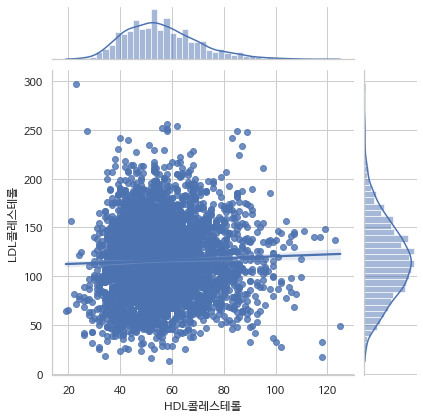

In [21]:
sns.jointplot(data = health_CHOLE, x='HDL콜레스테롤', y='LDL콜레스테롤',palette='Set2',kind='reg');

아래의 그래프를 보면 대부분의 점들이 선형관계를 표현하는 regression라인을 거의 벗어나있는 것을 확인할 수 있다.
따라서 **HDL콜레스테롤과 LDL콜레스테롤은 상관과계가 있다고 보기 어렵다.** 

### **2) 성별에 따른 HDL 콜레스테롤의 수치**

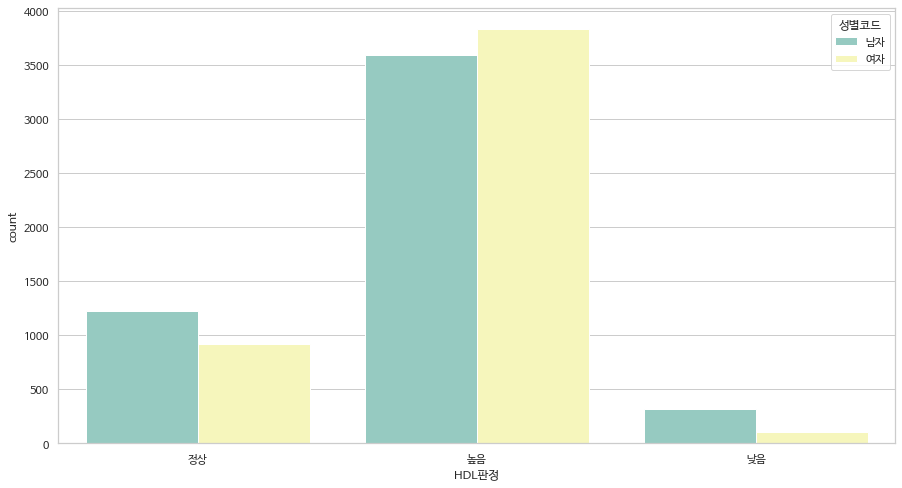

In [22]:
plt.figure(figsize = (15,8))
sns.countplot(data=health_CHOLE, x='HDL판정',hue='성별코드', palette='Set3');

HDL 콜레스테롤의 수치를 판정한 결과를 가지고 남자와 여자로 나누어 비교해보았다. HDL 콜레스테롤이 높을 경우 동맥경화나 관상동맥질환의 위험도가 낮아지는데 **대부분의 사람들이 높거나 정상인 것을 보아 대부분 괜찮은 수치로 나온 것을 알 수 있다.**

### **2)-2 HDL 콜레스테롤의 수치가 낮은 사람 중 흡연 여부**

HDL 콜레스테롤이 저하되는 원인은 나쁜 식사습관, 운동부족, 비만, 흡연, 스트레스의 축적 등이다. 그 비율을 원그래프로 확인해본다.


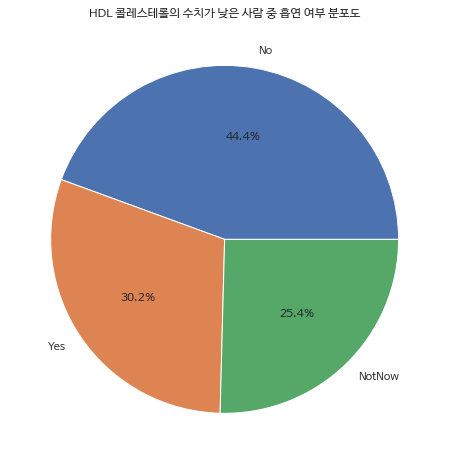

In [23]:
blood = health_CHOLE.loc[(health_CHOLE['HDL판정'] == '낮음') ]
x = blood['흡연상태'].value_counts()
x1 = x.index
y = x.values

plt.figure(figsize = (15,8))
plt.pie(y, labels = x1, autopct='%1.1f%%')
plt.title('HDL 콜레스테롤의 수치가 낮은 사람 중 흡연 여부 분포도')
plt.show()

그래프를 보면 HDL 콜레스테롤이 낮게 나온 사람 중 흡연을 하지 않는 사람은 44.4%, 흡연을 하거나 했던 적이 있는 사람은 55.6%이다. **큰 차이가 없는 걸로 보아 HDL 콜레스테롤이 저하되는 원인으로 흡연 외의 경우도 고려해보아야 한다.** 

### **3) 연령대에 따른 LDL 콜레스테롤의 수치**

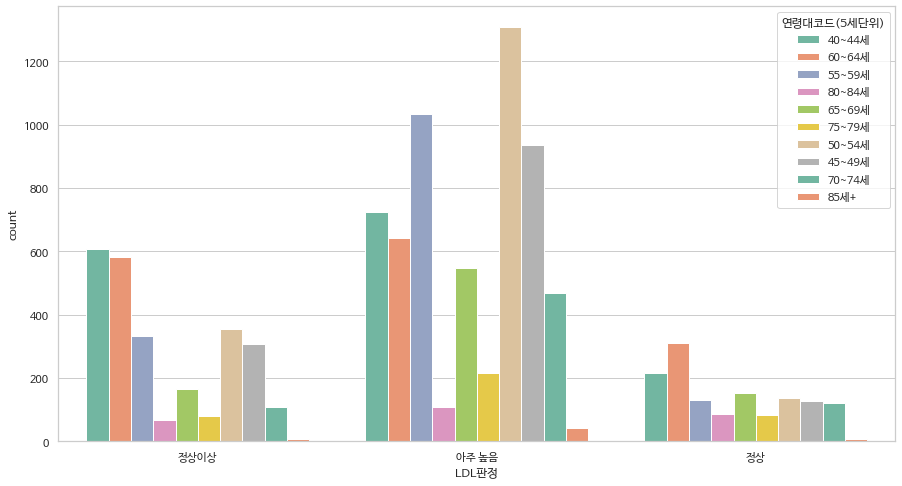

In [24]:
# 연령대에 따른 LDL 콜레스테롤의 수치
plt.figure(figsize = (15,8))
sns.countplot(data=health_CHOLE, x='LDL판정',hue='연령대코드(5세단위)', palette='Set2');

LDL콜레스테롤은 정상인 사람보다 대부분의 사람이 정상이상 또는 아주 높음으로 좋지 않게 나왔다. 그 중에서도 50~54세의 사람들의 LDL 콜레스테롤이 가장 좋지 않게 나온 것을 볼 수 있다. 

#최종 결론#

위의 HDL콜레스테롤과 LDL콜레스테롤의 상관관계 그래프에서 볼 수 있었듯이 HDL콜레스테롤과 LDL콜레스테롤 간에는 상관관계가 거의 존재하지 않는 것을 2)번과 3)번의 막대그래프 결과에서도 볼 수 있다. 


대부분의 사람들의 HDL 콜레스테롤는 좋게 나왔고, 대부분의 사람들의 LDL 콜레스테롤이 좋지 않은 수치로 나왔다. 

따라서 HDL 콜레스테롤의 수치가 LDL 콜레스테롤의 수치에 영향을 미치지 않는 것을 볼 수 있다. 